### Estimación de las curvas ante medidas de aislamiento 

Este algoritmo utiliza el modelo SEIR que es un sistema de ecuaciones diferenciales, el cual determina el proceso infeccioso de una población finita. Este modelo considera medidas de distanciamiento social, y da como resultado el número de la población infectada.

Escrito por Ricardo Cavieses
cavieses@uabcs.mx ,
profesor en el Departamento de ingeniería en pesquería, de la
Universidad Autónoma de Baja California Sur, México.  
Actualizado el 5 de abril de 2020.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [2]:
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [3]:
# Determinación de parámetros
t_max = 200
tt=201
dt = 1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 30000 #pooblación de la paz estimada
init_vals = 1 - 8/N, 8/N, 0, 0
alpha = 0.2
beta = 4
gamma = 0.5
rho=1
params = alpha, beta, gamma, rho
# Run simulation
results =  seir_model_with_soc_dist(init_vals, params, t)


In [4]:
Expuestos=pd.Series(results[:,1]*300,index=pd.date_range('4/4/2020',freq='D',periods=tt))
Infectados=pd.Series(results[:,2]*300,index=pd.date_range('4/4/2020',freq='D',periods=tt))
defunciones=pd.Series(results[:,2]*300*0.04,index=pd.date_range('4/4/2020',freq='D',periods=tt))
Recuperados=pd.Series((results[:,3]*300)-defunciones,index=pd.date_range('4/4/2020',freq='D',periods=tt))
Suceptibles=pd.Series((results[:,0]*300),index=pd.date_range('4/4/2020',freq='D',periods=201))

In [5]:
rho=0.8
params = alpha, beta, gamma, rho
# se corre simulacion
results2 = seir_model_with_soc_dist(init_vals, params, t)

In [6]:
Expuestos2=pd.Series(results2[:,1]*300,index=pd.date_range('4/4/2020',freq='D',periods=tt))
Infectados2=pd.Series(results2[:,2]*300,index=pd.date_range('4/4/2020',freq='D',periods=tt))
defunciones2=pd.Series(results2[:,2]*300*0.04,index=pd.date_range('4/4/2020',freq='D',periods=tt))
Recuperados2=pd.Series((results2[:,3]*300)-defunciones,index=pd.date_range('4/4/2020',freq='D',periods=tt))
Suceptibles2=pd.Series((results2[:,0]*300),index=pd.date_range('4/4/2020',freq='D',periods=tt))

In [7]:
rho=0.5
params = alpha, beta, gamma, rho
# se corre simulacion
results3 = seir_model_with_soc_dist(init_vals, params, t)
Expuestos3=pd.Series(results3[:,1]*300,index=pd.date_range('4/4/2020',freq='D',periods=tt))
Infectados3=pd.Series(results3[:,2]*300,index=pd.date_range('4/4/2020',freq='D',periods=tt))
defunciones3=pd.Series(results3[:,2]*300*0.04,index=pd.date_range('4/4/2020',freq='D',periods=tt))
Recuperados3=pd.Series((results3[:,3]*300)-defunciones3,index=pd.date_range('4/4/2020',freq='D',periods=tt))
Suceptibles3=pd.Series((results3[:,0]*300),index=pd.date_range('4/4/2020',freq='D',periods=tt))

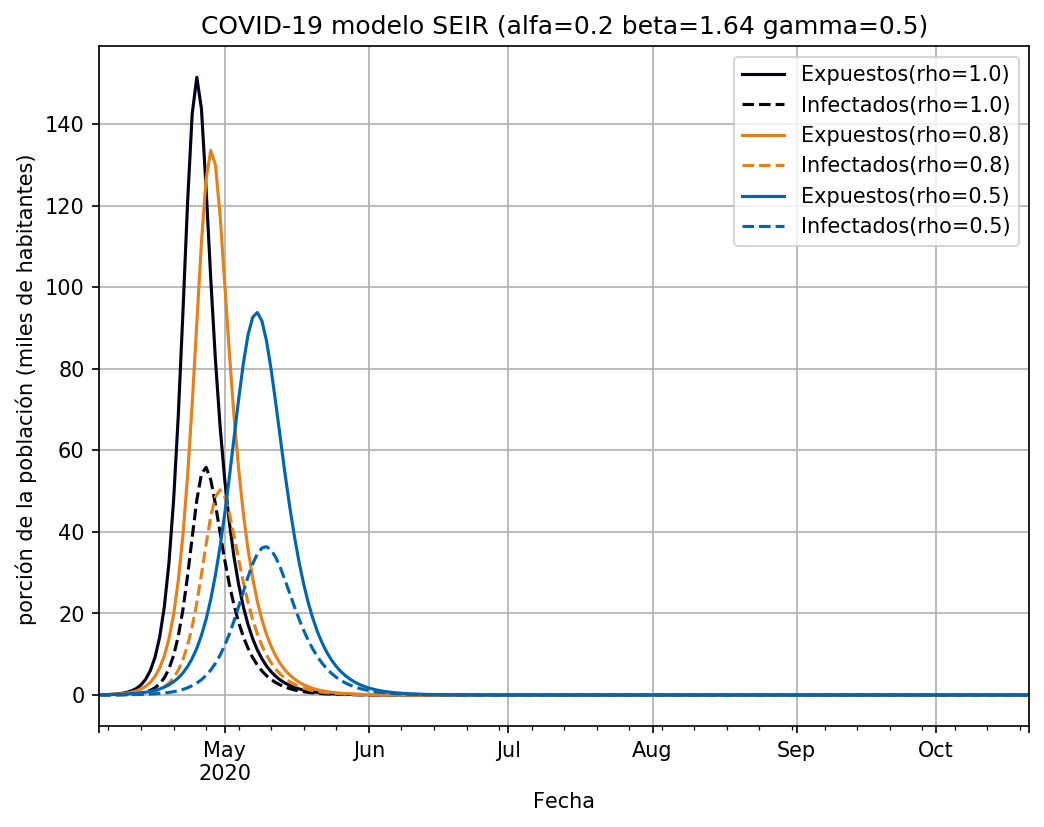

In [8]:
fig3=pyplot.figure(figsize=[8,6],dpi=150)
ax3 = fig3.add_subplot(1,1,1)

Expuestos.plot(label='Expuestos(rho=1.0)',color=(0,0.01,0.1,1))
Infectados.plot(label='Infectados(rho=1.0)',linestyle='dashed',color=(0,0.01,0.1,1))

Expuestos2.plot(label='Expuestos(rho=0.8)',color=(0.9,0.5,0.1,1))
Infectados2.plot(label='Infectados(rho=0.8)',linestyle='dashed',color=(0.9,0.5,0.1,1))

Expuestos3.plot(label='Expuestos(rho=0.5)',color=(0,0.4,0.7,1))
Infectados3.plot(label='Infectados(rho=0.5)',linestyle='dashed',color=(0,0.4,0.7,1))

ax3.set(xlabel='Fecha', ylabel='porción de la población (miles de habitantes) ',
       title='COVID-19 modelo SEIR (alfa=0.2 beta=1.64 gamma=0.5)')

pyplot.legend(loc=1)
pyplot.grid()
pyplot.show()
fig3.savefig('tres2.png' )

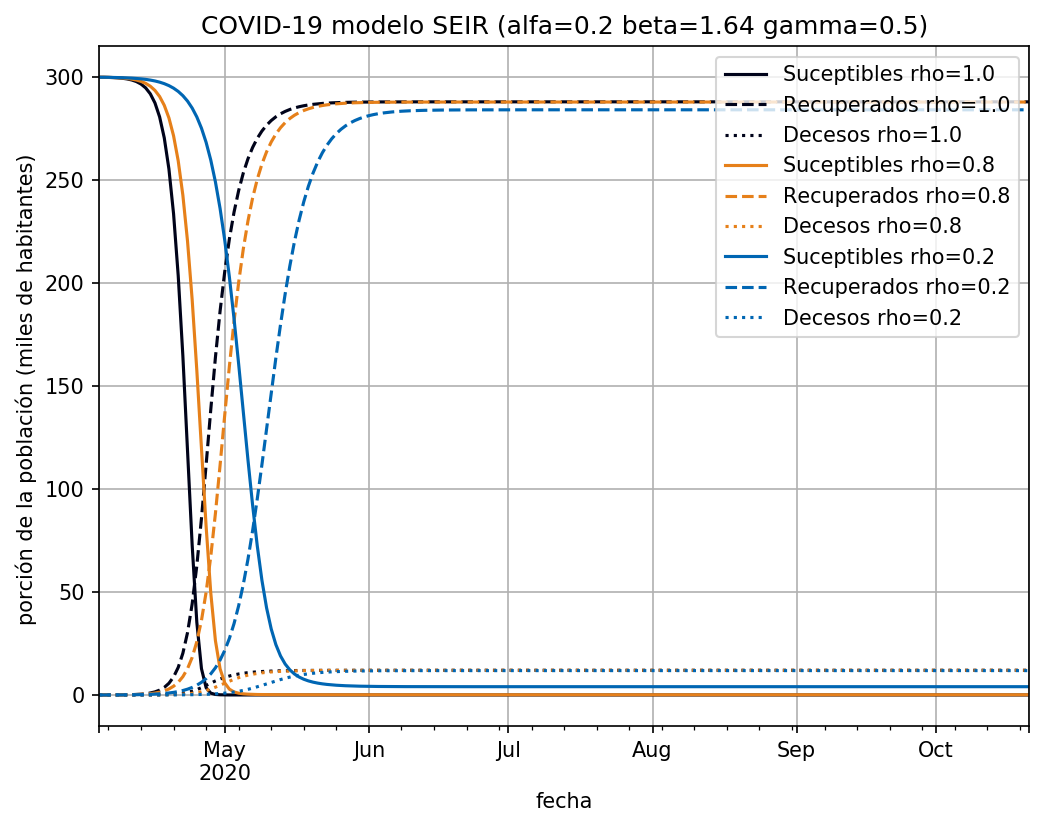

In [9]:
fig4= pyplot.figure(figsize=[8,6],dpi=150)
ax4 = fig4.add_subplot(1,1,1)

Suceptibles.plot(label='Suceptibles rho=1.0',color=(0,0.01,0.1,1))
Recuperados.plot(label='Recuperados rho=1.0',linestyle='dashed',color=(0,0.01,0.1,1))
defunciones.plot(label='Decesos rho=1.0',linestyle='dotted',color=(0,0.01,0.1,1))

Suceptibles2.plot(label='Suceptibles rho=0.8',color=(0.9,0.5,0.1,1))
Recuperados2.plot(label='Recuperados rho=0.8',linestyle='dashed',color=(0.9,0.5,0.1,1))
defunciones2.plot(label='Decesos rho=0.8',linestyle='dotted',color=(0.9,0.5,0.1,1))

Suceptibles3.plot(label='Suceptibles rho=0.2',color=(0,0.4,0.7,1))
Recuperados3.plot(label='Recuperados rho=0.2',linestyle='dashed',color=(0,0.4,0.7,1))
defunciones3.plot(label='Decesos rho=0.2',linestyle='dotted',color=(0,0.4,0.7,1))


ax4.set(xlabel='fecha', ylabel='porción de la población (miles de habitantes) ',
       title='COVID-19 modelo SEIR (alfa=0.2 beta=1.64 gamma=0.5)')
pyplot.legend(loc=1)
pyplot.grid()
pyplot.show()
fig4.savefig('cuatro2.png')

2.7921907550925518


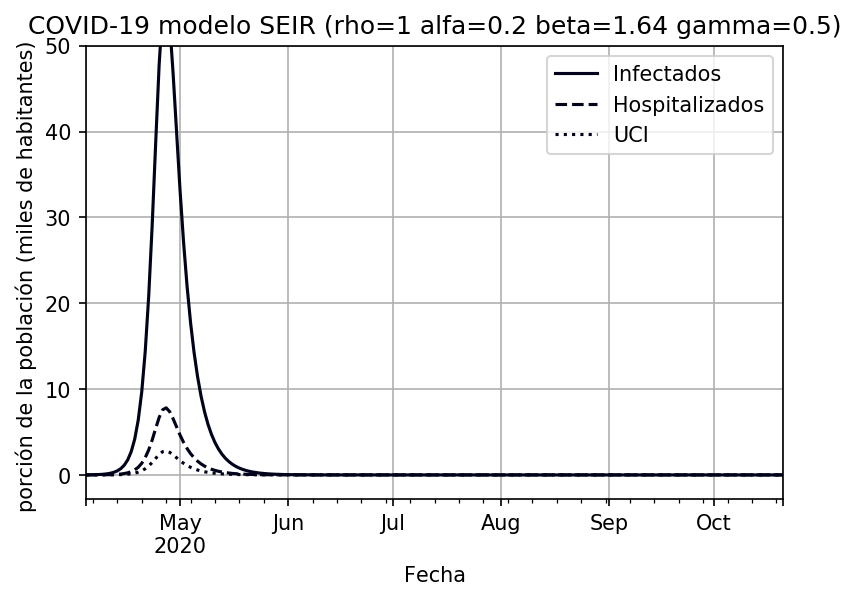

In [10]:
Hospitalizados=Infectados*0.14
UCI=Infectados*0.05
maxUCI=max(UCI)
print(maxUCI)

fig5=pyplot.figure(figsize=[6,4],dpi=150)
ax5 = fig5.add_subplot(1,1,1)

Infectados.plot(label='Infectados',color=(0,0.01,0.1,1))
Hospitalizados.plot(label='Hospitalizados',linestyle='dashed',color=(0,0.01,0.1,1))
UCI.plot(label='UCI',linestyle='dotted',color=(0,0.01,0.1,1) )

ax5.set(xlabel='Fecha', ylabel='porción de la población (miles de habitantes) ',
       title='COVID-19 modelo SEIR (rho=1 alfa=0.2 beta=1.64 gamma=0.5)')
pyplot.legend(loc=1)
pyplot.ylim(top=50)
pyplot.grid()
pyplot.show()
fig5.savefig('relacionI_H_UCIr1.png')

2.5155505084131966


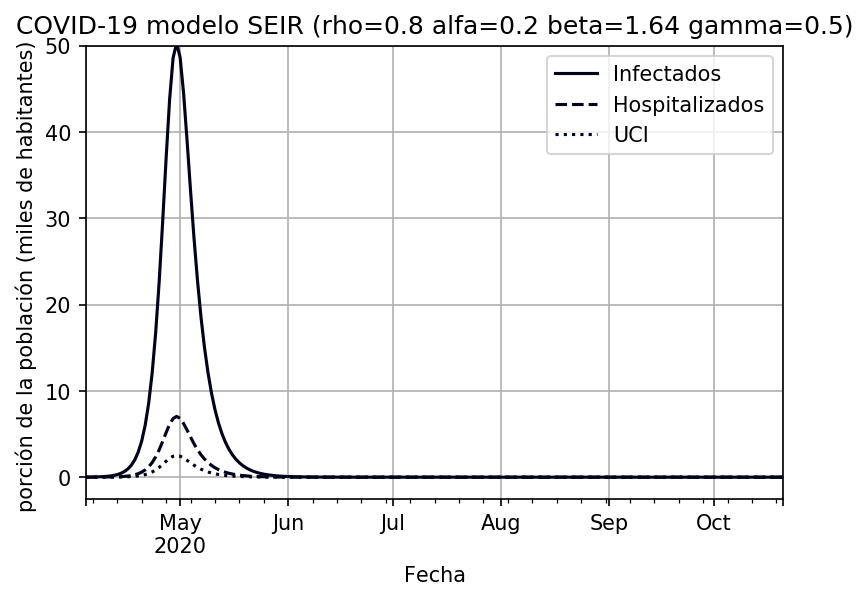

In [11]:
Hospitalizados2=Infectados2*0.14
UCI2=Infectados2*0.05
maxUCI2=max(UCI2)
print(maxUCI2)

fig6=pyplot.figure(figsize=[6,4],dpi=150)
ax6 = fig6.add_subplot(1,1,1)

Infectados2.plot(label='Infectados',color=(0,0.01,0.1,1))
Hospitalizados2.plot(label='Hospitalizados',linestyle='dashed',color=(0,0.01,0.1,1))
UCI2.plot(label='UCI',linestyle='dotted',color=(0,0.01,0.1,1) )

ax6.set(xlabel='Fecha', ylabel='porción de la población (miles de habitantes) ',
       title='COVID-19 modelo SEIR (rho=0.8 alfa=0.2 beta=1.64 gamma=0.5)')
pyplot.ylim(top=50)
pyplot.legend(loc=1)
pyplot.grid()
pyplot.show()
fig6.savefig('relacionI_H_UCIr08.png')

1.8187172894547032


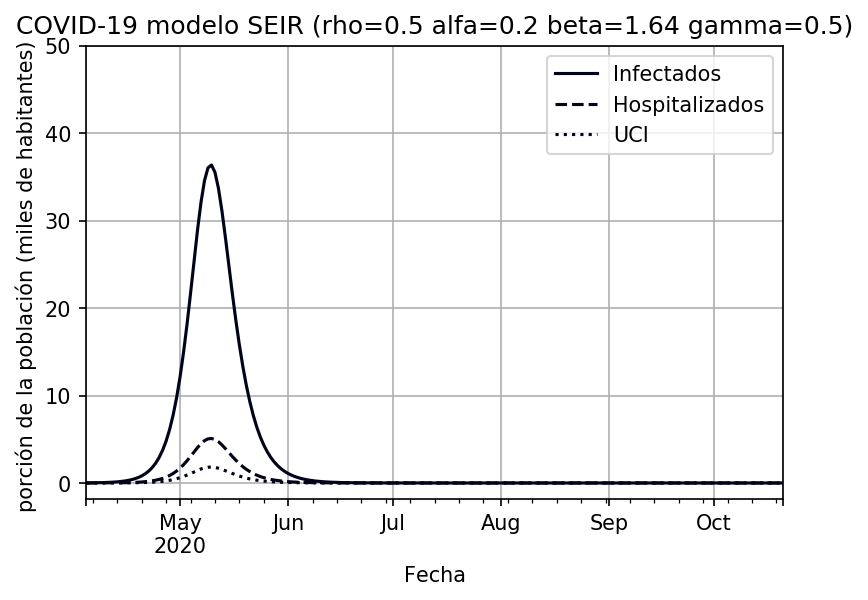

In [12]:
Hospitalizados3=Infectados3*0.14
UCI3=Infectados3*0.05
maxUCI3=max(UCI3)
print(maxUCI3)

fig7=pyplot.figure(figsize=[6,4],dpi=150)
ax7 = fig7.add_subplot(1,1,1)

Infectados3.plot(label='Infectados',color=(0,0.01,0.1,1))
Hospitalizados3.plot(label='Hospitalizados',linestyle='dashed',color=(0,0.01,0.1,1))
UCI3.plot(label='UCI',linestyle='dotted',color=(0,0.01,0.1,1) )

ax7.set(xlabel='Fecha', ylabel='porción de la población (miles de habitantes) ',
       title='COVID-19 modelo SEIR (rho=0.5 alfa=0.2 beta=1.64 gamma=0.5)')
pyplot.ylim(top=50)
pyplot.legend(loc=1)
pyplot.grid()
pyplot.show()
fig7.savefig('relacionI_H_UCIr05.png')